In [37]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("eluvio.csv")

In [41]:
df.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [42]:
# Check for nan values if any
df.isnull().values.any()

False

In [43]:
# distribution of data based on category
print("Total number of categories ", len(df.category.unique()))
print("Total number of authors ", len(df.author.unique()))

Total number of categories  1
Total number of authors  85838


In [44]:
# Articles having lowest up_votes
df[df.up_votes == 0]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
18,1201834758,2008-02-01,0,0,European Commission takes Greece to court over...,False,Moldavite,worldnews
22,1201893780,2008-02-01,0,0,"Merkel to meet leaders of Turkey, United Arab ...",False,Moldavite,worldnews
26,1201908785,2008-02-01,0,0,Germany rejects troop request for southern Afg...,False,Moldavite,worldnews
32,1201987918,2008-02-02,0,0,Nicolas Sarkozy and Carla Bruni marry,False,Moldavite,worldnews
...,...,...,...,...,...,...,...,...
509210,1479813162,2016-11-22,0,0,Almost half the world will be online by end of...,False,ManiaforBeatles,worldnews
509216,1479814686,2016-11-22,0,0,Turkish court issues arrest warrant for PYD he...,False,CeFurkan,worldnews
509219,1479815187,2016-11-22,0,0,Four killed in New Caledonia landslides: Frenc...,False,moodyno,worldnews
509220,1479815309,2016-11-22,0,0,Philippine opposition senator accusing preside...,False,benjo-the-great,worldnews


In [45]:
# Top 10 articles having highest up_votes
df[df.up_votes.isin(np.sort(df.up_votes)[-10:].tolist())]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
377200,1434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews
388230,1438963135,2015-08-07,10377,0,Brazilian radio host famous for exposing corru...,False,fiffers,worldnews
390252,1439939168,2015-08-18,11288,0,Paris shooting survivor suing French media for...,False,seapiglet,worldnews
390494,1440030633,2015-08-20,10515,0,ISIS beheads 81-year-old pioneer archaeologist...,False,DawgsOnTopUGA,worldnews
391318,1440367768,2015-08-23,12333,0,The police officer who leaked the footage of t...,False,navysealassulter,worldnews
391415,1440421079,2015-08-24,13435,0,Twitter has forced 30 websites that archive po...,False,joeyoungblood,worldnews
397215,1442535288,2015-09-18,10922,0,Brazil s Supreme Court has banned corporate co...,False,DoremusJessup,worldnews
449809,1459336773,2016-03-30,11108,0,Hundreds of thousands of leaked emails reveal ...,False,Xiroth,worldnews
450818,1459706506,2016-04-03,13244,0,2.6 terabyte leak of Panamanian shell company ...,False,mister_geaux,worldnews
500786,1476881235,2016-10-19,10394,0,Feeding cows seaweed could slash global greenh...,False,mvea,worldnews


In [46]:
# Check the unique values in down_votes. It seems all the down_votes == 0
df.down_votes.unique()

array([0])

In [47]:
# distribution of data based on over_18
df.groupby('over_18').count()['time_created']

over_18
False    508916
True        320
Name: time_created, dtype: int64

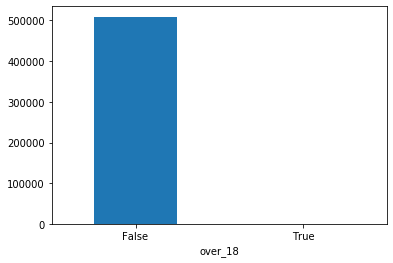

In [48]:
df_over_18 = df.groupby('over_18').count()['time_created']
ax = df_over_18.plot.bar(x='over_18', rot=0)

In [49]:
# Since category and down_votes does not have any unique values 
# and not so helpful for analysis, we will drop those columns
# We will also not work with time column, so drop them too
df = df.drop(columns=['down_votes', 'category', 'time_created', 'date_created'])

In [50]:
# Get all the authors who writes below_18 articles
# df_below_18_author = df.loc[df['over_18'] == False].groupby('author').count().reset_index()
# df_below_18_author

In [51]:
# Get all the authors who writes over_18 articles
# df_over_18_author = df.loc[df['over_18'] == True].groupby('author').count().reset_index()
# df_over_18_author

In [52]:
# pd.merge(df_below_18_author, df_over_18_author, on=['author'], how='inner')

In [53]:
df = df[df.over_18 == False]
df = df.drop(columns=['over_18'])

In [54]:
# There is not end of sentence mark in any of the title
df.loc[122]['title']

'U.S. official, up to 4 Chinese face spy charges - Security- msnbc.com'

In [55]:
print("The total number of articles = ", df.shape[0])

The total number of articles =  508916


In [56]:
print("Average number of articles written by each author = ", df.groupby('author')['title'].count().mean())

Average number of articles written by each author =  5.9346036336497425


In [57]:
# describe the dataset
df['up_votes'].describe()

count    508916.000000
mean        112.067681
std         541.169934
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [58]:
from nltk.tokenize import TreebankWordTokenizer
from nltk import ngrams
from collections import Counter
tokenizer = TreebankWordTokenizer()
# df_title = df['title'].apply(lambda x: tokenizer.tokenize(x))

In [59]:
# text = tokenizer.tokenize(' '.join(df['title'].values))
text = ' '.join(df['title'].values)

In [60]:
text_trigrams = [i for i in ngrams(text.split(), 3)]

In [61]:
# Get the most common trigrams
Counter(text_trigrams).most_common(20)

[(('BBC', 'News', '-'), 2657),
 (('the', 'country', 's'), 1823),
 (('one', 'of', 'the'), 1357),
 (('the', 'world', 's'), 1310),
 (('South', 'China', 'Sea'), 1264),
 (('-', 'BBC', 'News'), 1234),
 (('the', 'United', 'States'), 1108),
 (('the', 'first', 'time'), 906),
 (('for', 'the', 'first'), 814),
 (('as', 'part', 'of'), 742),
 (('|', 'World', 'news'), 725),
 (('in', 'the', 'world'), 690),
 (('North', 'Korea', 's'), 657),
 (('of', 'thousands', 'of'), 623),
 (('of', 'the', 'world'), 606),
 (('according', 'to', 'a'), 597),
 (('the', 'end', 'of'), 590),
 (('in', 'the', 'country'), 557),
 (('have', 'been', 'killed'), 539),
 (('the', 'Islamic', 'State'), 539)]

In [62]:
# Get the most common bigrams
text_bigrams = [i for i in ngrams(text.split(), 2)]
Counter(text_bigrams).most_common(20)

[(('in', 'the'), 21242),
 (('of', 'the'), 20818),
 (('to', 'the'), 9029),
 (('on', 'the'), 7498),
 (('to', 'be'), 7459),
 (('in', 'a'), 7110),
 (('of', 'a'), 6513),
 (('North', 'Korea'), 6305),
 (('for', 'the'), 6246),
 (('Islamic', 'State'), 4685),
 (('killed', 'in'), 4655),
 (('in', 'Syria'), 4472),
 (('has', 'been'), 4433),
 (('and', 'the'), 4216),
 (('have', 'been'), 4190),
 (('from', 'the'), 4145),
 (('by', 'the'), 3990),
 (('BBC', 'News'), 3957),
 (('more', 'than'), 3760),
 (('the', 'country'), 3560)]

In [63]:
# Get the most common bigrams
text_unigrams = [i for i in ngrams(text.split(), 1)]
Counter(text_unigrams).most_common(20)

[(('to',), 204872),
 (('in',), 195865),
 (('the',), 176095),
 (('of',), 170375),
 (('a',), 93120),
 (('and',), 84175),
 (('s',), 78466),
 (('for',), 75929),
 (('on',), 69965),
 (('-',), 40827),
 (('as',), 36237),
 (('by',), 35913),
 (('is',), 35716),
 (('with',), 34981),
 (('The',), 34683),
 (('from',), 31729),
 (('at',), 28961),
 (('has',), 27888),
 (('that',), 27588),
 (('after',), 24845)]

In [66]:
df_title_votes = df.drop(columns=['author'])
df_title_votes

,up_votes,title
0,3,Scores killed in Pakistan clashes
1,2,Japan resumes refuelling mission
2,3,US presses Egypt on Gaza border
3,1,Jump-start economy: Give health care to all
4,4,Council of Europe bashes EU&UN terror blacklist
...,...,...
509231,5,Heil Trump : Donald Trump s alt-right white...
509232,1,There are people speculating that this could b...
509233,1,Professor receives Arab Researchers Award
509234,1,Nigel Farage attacks response to Trump ambassa...


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_title_votes, test_size=0.2, random_state=163)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(df_title_votes['title'].values)

In [79]:
%%time
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train_df['title'])
test_vectorized = vectorizer.transform(test_df['title'])

In [80]:
y = train_df['up_votes']

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [86]:
%%time
ovr.fit(train_vectorized, y)

/home/oyashi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 